# MELTS v. 1.2.0
  
Versions of MELTS implemented are:  
- MELTS v. 1.0.2 ➞ (rhyolite-MELTS, Gualda et al., 2012)  
- MELTS v. 1.1.0 ➞ (rhyolite-MELTS + new CO<sub>2</sub>, works at the ternary minimum)  
- MELTS v. 1.2.0 ➞ (rhyolite-MELTS + new H<sub>2</sub>O + new CO<sub>2</sub>)  
- pMELTS v. 5.6.1

## Initialize tools and packages that are required to execute this notebook.

In [1]:
from thermoengine import equilibrate
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd
%matplotlib inline

## Create a MELTS v 1.2.0 instance.
Rhyolite-MELTS version 1.0.2 is the default model.

In [2]:
melts = equilibrate.MELTSmodel('1.2.0')

### Optional: Generate some information about the implemented model.

In [3]:
oxides = melts.get_oxide_names()
phases = melts.get_phase_names()
#print (oxides)
#print (phases)

## Required: Input initial composition of the system (liquid), in wt% or grams of oxides. 


In [4]:
#Fe2O3 Calc 
def Fe2O3Calc(FeOwt, Fe3FeT_ratio):
    FeO = FeOwt * (1 - Fe3FeT_ratio)
    Fe2O3 = FeOwt * (Fe3FeT_ratio) * 1.11 # 1.11 converts for molar mass diferences
    return FeO, Fe2O3

In [5]:
FeO, Fe2O3 = Fe2O3Calc(8.18,0.1)
melt_composition = {'SiO2':  50.21, 
                                       'TiO2':   1.7, 
                                       'Al2O3':  15.16, 
                                    #    'Fe2O3':  Fe2O3,#  # Need to calcuate ferric iron for models to run properly Assumed 4%
                                       'FeO':    10.29, # Total Feo 8.18 wt% 
                                       'MnO':    0.0, #0.13 Excluded for modeling
                                       'MgO':   8.08, 
                                    #    'NiO':    0.0, #0.24 Excluded 
                                    #    'CoO':    0.0,
                                       'CaO':    11.58, 
                                       'Na2O':   2.53, 
                                       'K2O':    0.12, 
                                       # 'P2O5':   0.0, #
                                    #    'H2O':    0.2, }) # 0.011 Water included 110 ppm
}


def set_melt_composition(comp_dict_init, Fe3FeT_ratio, H2O_wt, melts_object = melts):
    # Assumes all iron is input as FeO modify this if needed
    comp_dict = deepcopy(comp_dict_init)
    FeO, Fe2O3 = Fe2O3Calc(comp_dict['FeO'],Fe3FeT_ratio) 
    comp_dict.update([("FeO",FeO), ("Fe2O3", Fe2O3), ("H2O",H2O_wt)])
    # Set bulk composition in Melts
    melts_object.set_bulk_composition(comp_dict) # 0.011 Water included 110 ppm

In [6]:
# set_melt_composition(melt_composition, Fe3FeT_ratio=0.1, H2O_wt=0.011)

## Optional: Suppress phases that are not required in the simulation.

In [7]:
b = melts.get_phase_inclusion_status()
# melts.set_phase_inclusion_status({'Nepheline':False, 'OrthoOxide':False})
a = melts.get_phase_inclusion_status()
for phase in b.keys():
    if b[phase] != a[phase]:
        print ("{0:<15s} Before: {1:<5s} After: {2:<5s}".format(phase, repr(b[phase]), repr(a[phase])))

## Compute the equilibrium state at some specified T (°C) and P (MPa).
Print status of the calculation.

In [8]:
output = melts.equilibrate_tp(1300.0, 100.0, initialize=True)
(status, t, p, xmlout) = output[0]
print (status, t, p)

success, Trivial case with no quadratic search. 1300.0 100.0


### Summary output of equilibrium state ...

In [9]:
melts.output_summary(xmlout)

T (°C)      1300.00
P (MPa)      100.00


If running a model with fractionation you can se the fractionated phase here. and the coefficients of the fractionation model.

In [10]:
# frac_coeff = melts.get_dictionary_of_default_fractionation_coefficients(fracLiq=True, fracSolid=False, fracFluid=False, fracCoeff=1.) % Removes liquid
frac_coeff = melts.get_dictionary_of_default_fractionation_coefficients(fracLiq=False, fracSolid=True, fracFluid=False, fracCoeff=1.) # Removes solids
print (frac_coeff)

{'Actinolite': 1.0, 'Aegirine': 1.0, 'Aenigmatite': 1.0, 'Akermanite': 1.0, 'Andalusite': 1.0, 'Anthophyllite': 1.0, 'Apatite': 1.0, 'Augite': 1.0, 'Biotite': 1.0, 'Chromite': 1.0, 'Coesite': 1.0, 'Corundum': 1.0, 'Cristobalite': 1.0, 'Cummingtonite': 1.0, 'Fayalite': 1.0, 'Fluid': 0.0, 'Forsterite': 1.0, 'Garnet': 1.0, 'Gehlenite': 1.0, 'Hematite': 1.0, 'Hornblende': 1.0, 'Ilmenite': 1.0, 'Ilmenite ss': 1.0, 'Kalsilite': 1.0, 'Kalsilite ss': 1.0, 'Kyanite': 1.0, 'Leucite': 1.0, 'Lime': 1.0, 'Liquid': 0.0, 'Liquid Alloy': 1.0, 'Magnetite': 1.0, 'Melilite': 1.0, 'Muscovite': 1.0, 'Nepheline': 1.0, 'Nepheline ss': 1.0, 'Olivine': 1.0, 'OrthoOxide': 1.0, 'Orthopyroxene': 1.0, 'Panunzite': 1.0, 'Periclase': 1.0, 'Perovskite': 1.0, 'Phlogopite': 1.0, 'Pigeonite': 1.0, 'Plagioclase': 1.0, 'Quartz': 1.0, 'Rutile': 1.0, 'Sanidine': 1.0, 'Sillimanite': 1.0, 'Solid Alloy': 1.0, 'Sphene': 1.0, 'Spinel': 1.0, 'Titanaugite': 1.0, 'Tridymite': 1.0, 'Whitlockite': 1.0}


### Output thermodynamic properties of any phase present in the system
... or the sum of all phases in the system

In [11]:
props = melts.get_list_of_properties()
for prop in props:
    print ("{0:<20s} {1:13.6e} {2:<10s}".format(prop, melts.get_property_of_phase(xmlout,'System', prop), \
                                                melts.get_units_of_property(prop)))

Mass                  0.000000e+00 g         
GibbsFreeEnergy       0.000000e+00 J         
Enthalpy              0.000000e+00 J         
Entropy               0.000000e+00 J/K       
HeatCapacity          0.000000e+00 J/K       
DcpDt                 0.000000e+00 J/K^2     
Volume                0.000000e+00 J/bar     
DvDt                  0.000000e+00 J/bar-K   
DvDp                  0.000000e+00 J/bar^2   
D2vDt2                0.000000e+00 J/bar-K^2 
D2vDtDp               0.000000e+00 J/bar^2-K 
D2vDp2                0.000000e+00 J/bar^3   


/opt/conda/lib/python3.10/site-packages/thermoengine/equilibrate.py:4071: DeprecationWarning: invalid escape sequence '\*'
  """Sets the bulk composition of the system


ZeroDivisionError: float division by zero

### Output chemical affinities and potential compositions of undersaturated phases 

In [ ]:
dict = melts.get_dictionary_of_affinities(xmlout, sort=True)
for phase in dict:
    (affinity, formulae) = dict[phase]
    print ("{0:<20s} {1:10.2f} {2:<60s}".format(phase, affinity, formulae))

Olivine                 4794.87 (Ca0.01Mg1.00Fe''0.00Mn0.00Co0.00Ni0.00)2SiO4               
Augite                  5722.75 Na0.01Ca0.99Fe''0.77Mg0.01Fe'''0.07Ti0.01Al0.37Si1.78O6     
Plagioclase             5839.48 K1.00Na0.00Ca-0.00Al1.00Si3.00O8                            
Orthopyroxene           6002.06 Na0.01Ca0.99Fe''0.81Mg0.01Fe'''0.05Ti0.01Al0.30Si1.82O6     
Quartz                  8270.17 SiO2                                                        
Cristobalite            9094.67 SiO2                                                        
Tridymite               9095.24 SiO2                                                        
Forsterite              9175.03 Mg2SiO4                                                     
Spinel                 13168.03 Fe''0.18Mg0.85Fe'''0.23Al1.70Cr0.00Ti0.04O4                 
Coesite                17543.58 SiO2                                                        
Ilmenite ss            19620.03 Mn0.00Fe''0.49Mg0.00Fe'''0.00Al1.01Ti0

## Run the sequence of calculations along a T, P=constant path:
Output is sent to an Excel file and plotted in the notebook

In [12]:
def run_batch_melting(t0,
            t_f,
            p0,
            p_f=1,
            n_steps=40,
            t_step=-10,
            p_step=-0,
            melts_obj=melts,
            frac_coeff = frac_coeff,
            Fractionate = False,
            track_phases=None,
            write_excel=False,
            excel_filename="Melts_summary.xlsx",
            sheet_name="Summary"):
    """
        Run a batch sequence along a specified P-T path.

        Parameters:
        - t0, p0: initial temperature (°C) and pressure (MPa)
        - n_steps: number of steps (including initial)
        - t_step, p_step: increments applied at each step (can be negative)
        - melts_obj: MELTS model object (uses global `melts` by default)
        - track_phases: list of phase names to record masses (defaults to common set)
        - write_excel: whether to create/update/write an Excel workbook via melts methods
        - excel_filename, sheet_name: workbook parameters when write_excel=True

        Returns:
        - df: pandas.DataFrame with recorded step data (T, P, masses, liquid fractions, oxide wt% of liquid, frac_coeff_liq)
        - params: dictionary with run parameters
    """
    p_array = np.linspace(p0,p_f, n_steps)
    # t_step = t_step/p_step * pstep
    
    t_array = np.linspace(t0,t_f, n_steps)

    # defaults
    if track_phases is None:
        track_phases = ['Liquid', 'Olivine', 'Orthopyroxene', 'Augite', 'Spinel', 'Plagioclase']

    # oxide list (use existing variable if present)
    try:
        oxide_list = oxides
    except NameError:
        oxide_list = melts_obj.get_oxide_names()

    # prepare storage
    rows = []

    # optional excel workbook
    wb = None
    if write_excel:
        wb = melts_obj.start_excel_workbook_with_sheet_name(sheetName=sheet_name)

    # initial equilibrium
    # output = melts_obj.equilibrate_tp(t0, p0, initialize=True)
    # (status, t, p, xmlout) = output[0]

    # loop steps
    # for step in range(n_steps):
    for idx, p in enumerate(p_array):
        t = t_array[idx]
        output = melts_obj.equilibrate_tp(t, p, initialize=True)
        
        (status, _, _, xmlout) = output[0]
        # compute masses and fractions
        total_mass = melts_obj.get_mass_of_phase(xmlout)
        liquid_mass = melts_obj.get_mass_of_phase(xmlout, phase_name="Liquid")
        liquid_fraction = (liquid_mass / total_mass) if total_mass and total_mass != 0 else 0.0



        # record tracked phase masses
        phase_masses = {ph: melts_obj.get_mass_of_phase(xmlout, phase_name=ph) for ph in track_phases}

        # record liquid composition (wt% oxides)
        liquid_comp = melts_obj.get_composition_of_phase(xmlout, phase_name='Liquid', mode='oxide_wt')

        # ensure all oxides present
        liquid_comp_full = {ox: float(liquid_comp.get(ox, 0.0)) for ox in oxide_list}


        # append row
        row = {
            'step': idx,
            'status': status,
            'T_C': t,
            'P_MPa': p,
            'total_mass_g': total_mass,
            'liquid_mass_g': liquid_mass,
            'liquid_fraction': liquid_fraction,
        
        }
        # add phase masses
        for ph, m in phase_masses.items():
            row[f'mass_{ph}'] = m
        # add oxide wt% of liquid
        for ox, v in liquid_comp_full.items():
            row[f'liq_oxide_{ox}'] = v

        rows.append(row)

        # update excel if requested
        if write_excel:
            melts_obj.update_excel_workbook(wb, xmlout)

        

        print(f"T:{t}, P:{p}")

        if (idx < len(p_array) - 1) * Fractionate:
            melts_obj.fractionate_phases(xmlout, frac_coeff)

    # finalize excel
    if write_excel:
        melts_obj.write_excel_workbook(wb, excel_filename)


    # build dataframe
    df = pd.DataFrame(rows)

    params = {
        'initial_T_C': t0,
        'initial_P_MPa': p0,
        'n_steps': n_steps,
        't_step': t_step,
        'p_step': p_step,
        'tracked_phases': track_phases,
        'oxide_list': oxide_list,
    }
    df['liq_oxide_FeOTotal'] = df["liq_oxide_FeO"] + df['liq_oxide_Fe2O3']/1.11

    return df, params

In [13]:
set_melt_composition(melt_composition, Fe3FeT_ratio=0.1, H2O_wt=0.4)
p = 100
output_dict = run_batch_melting(t0 = 1200,
            t_f= 1140,
            p0 = p,
            p_f=p,
            n_steps=60,
            t_step=-10,
            p_step=-0,
            melts_obj=melts,
            frac_coeff = frac_coeff,
            Fractionate = False,
            track_phases=None,
            write_excel=False,
            excel_filename="Melts_summary.xlsx",
            sheet_name="Summary")

T:1200.0, P:100.0
T:1198.9830508474577, P:100.0
T:1197.9661016949153, P:100.0
T:1196.949152542373, P:100.0
T:1195.9322033898304, P:100.0
T:1194.915254237288, P:100.0
T:1193.8983050847457, P:100.0
T:1192.8813559322034, P:100.0
T:1191.864406779661, P:100.0
T:1190.8474576271187, P:100.0
T:1189.8305084745762, P:100.0
T:1188.8135593220338, P:100.0
T:1187.7966101694915, P:100.0
T:1186.7796610169491, P:100.0
T:1185.7627118644068, P:100.0
T:1184.7457627118645, P:100.0
T:1183.7288135593221, P:100.0
T:1182.7118644067796, P:100.0
T:1181.6949152542372, P:100.0
T:1180.677966101695, P:100.0
T:1179.6610169491526, P:100.0
T:1178.6440677966102, P:100.0
T:1177.6271186440679, P:100.0
T:1176.6101694915255, P:100.0
T:1175.593220338983, P:100.0
T:1174.5762711864406, P:100.0
T:1173.5593220338983, P:100.0
T:1172.542372881356, P:100.0
T:1171.5254237288136, P:100.0
T:1170.5084745762713, P:100.0
T:1169.4915254237287, P:100.0
T:1168.4745762711864, P:100.0
T:1167.457627118644, P:100.0
T:1166.4406779661017, P:100.0

In [14]:
df, params = output_dict
df.columns

Index(['step', 'status', 'T_C', 'P_MPa', 'total_mass_g', 'liquid_mass_g',
       'liquid_fraction', 'mass_Liquid', 'mass_Olivine', 'mass_Orthopyroxene',
       'mass_Augite', 'mass_Spinel', 'mass_Plagioclase', 'liq_oxide_SiO2',
       'liq_oxide_TiO2', 'liq_oxide_Al2O3', 'liq_oxide_Fe2O3',
       'liq_oxide_Cr2O3', 'liq_oxide_FeO', 'liq_oxide_MnO', 'liq_oxide_MgO',
       'liq_oxide_NiO', 'liq_oxide_CoO', 'liq_oxide_CaO', 'liq_oxide_Na2O',
       'liq_oxide_K2O', 'liq_oxide_P2O5', 'liq_oxide_H2O', 'liq_oxide_CO2',
       'liq_oxide_FeOTotal'],
      dtype='object')

In [15]:
df[['step', 'status', 'T_C', 'P_MPa', 'total_mass_g', 'liquid_mass_g',
       'liquid_fraction', 'mass_Liquid', 'mass_Olivine', 'mass_Orthopyroxene',
       'mass_Augite', 'mass_Spinel', 'mass_Plagioclase']].iloc[30:80]

,step,status,T_C,P_MPa,total_mass_g,liquid_mass_g,liquid_fraction,mass_Liquid,mass_Olivine,mass_Orthopyroxene,mass_Augite,mass_Spinel,mass_Plagioclase
30,30,"success, Trivial case with no quadratic search.",1169.491525,100.0,100.18319,96.077157,0.959015,96.077157,1.096642,0.0,0.283933,0.0,2.725459
31,31,"success, Trivial case with no quadratic search.",1168.474576,100.0,100.18319,96.077157,0.959015,96.077157,1.096642,0.0,0.283933,0.0,2.725459
32,32,"success, Trivial case with no quadratic search.",1167.457627,100.0,100.18319,96.077157,0.959015,96.077157,1.096642,0.0,0.283933,0.0,2.725459
33,33,"success, Trivial case with no quadratic search.",1166.440678,100.0,100.18319,96.077157,0.959015,96.077157,1.096642,0.0,0.283933,0.0,2.725459
34,34,"success, Trivial case with no quadratic search.",1165.423729,100.0,100.18319,96.077157,0.959015,96.077157,1.096642,0.0,0.283933,0.0,2.725459
35,35,"success, Trivial case with no quadratic search.",1164.406780,100.0,100.18319,96.077157,0.959015,96.077157,1.096642,0.0,0.283933,0.0,2.725459
36,36,"success, Trivial case with no quadratic search.",1163.389831,100.0,100.18319,96.077157,0.959015,96.077157,1.096642,0.0,0.283933,0.0,2.725459
37,37,"success, Optimal residual norm.",1162.372881,100.0,100.18319,78.605388,0.784617,78.605388,2.776438,0.0,8.030882,0.0,10.770481
38,38,"success, Trivial case with no quadratic search.",1161.355932,100.0,100.18319,78.605388,0.784617,78.605388,2.776438,0.0,8.030882,0.0,10.770481
39,39,"success, Trivial case with no quadratic search.",1160.338983,100.0,100.18319,78.605388,0.784617,78.605388,2.776438,0.0,8.030882,0.0,10.770481


In [16]:
# df[['step', 'status', 'T_C', 'P_MPa', 'total_mass_g', 'liquid_mass_g',
#        'liquid_fraction', 'mass_Liquid', 'mass_Olivine', 'mass_Orthopyroxene',
#        'mass_Augite', 'mass_Spinel', 'mass_Plagioclase']]
df['plag/aug']=df['mass_Plagioclase']/ df['mass_Augite']
df['plag/ol']=df['mass_Plagioclase']/ df['mass_Olivine']
df[['step', 'status', 'T_C', 'P_MPa', 'total_mass_g', 'liquid_mass_g',
       'liquid_fraction', 'mass_Liquid', 'mass_Olivine', 'mass_Orthopyroxene',
       'mass_Augite', 'mass_Spinel', 'mass_Plagioclase', 'plag/aug', 'plag/ol']]


,step,status,T_C,P_MPa,total_mass_g,liquid_mass_g,liquid_fraction,mass_Liquid,mass_Olivine,mass_Orthopyroxene,mass_Augite,mass_Spinel,mass_Plagioclase,plag/aug,plag/ol
0,0,"success, Trivial case with no quadratic search.",1200.000000,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
1,1,"success, Trivial case with no quadratic search.",1198.983051,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
2,2,"success, Trivial case with no quadratic search.",1197.966102,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
3,3,"success, Trivial case with no quadratic search.",1196.949153,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
4,4,"success, Trivial case with no quadratic search.",1195.932203,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
5,5,"success, Trivial case with no quadratic search.",1194.915254,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
6,6,"success, Trivial case with no quadratic search.",1193.898305,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
7,7,"success, Trivial case with no quadratic search.",1192.881356,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
8,8,"success, Trivial case with no quadratic search.",1191.864407,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN
9,9,"success, Trivial case with no quadratic search.",1190.847458,100.0,100.18319,100.183190,1.000000,100.183190,0.000000,0.0,0.000000,0.0,0.000000,NaN,NaN


(0.0, 20.0)

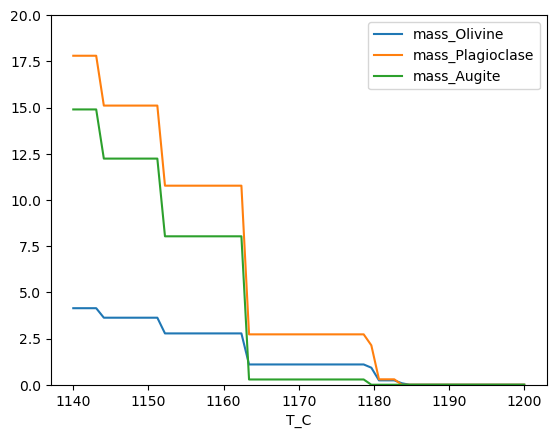

In [17]:
fig, ax = plt.subplots()
df.plot('T_C', 'mass_Olivine', ax = ax)
df.plot('T_C', 'mass_Plagioclase', ax = ax)
df.plot('T_C', 'mass_Augite', ax = ax)
plt.ylim(0,20)

In [19]:
df.columns

Index(['step', 'status', 'T_C', 'P_MPa', 'total_mass_g', 'liquid_mass_g',
       'liquid_fraction', 'mass_Liquid', 'mass_Olivine', 'mass_Orthopyroxene',
       'mass_Augite', 'mass_Spinel', 'mass_Plagioclase', 'liq_oxide_SiO2',
       'liq_oxide_TiO2', 'liq_oxide_Al2O3', 'liq_oxide_Fe2O3',
       'liq_oxide_Cr2O3', 'liq_oxide_FeO', 'liq_oxide_MnO', 'liq_oxide_MgO',
       'liq_oxide_NiO', 'liq_oxide_CoO', 'liq_oxide_CaO', 'liq_oxide_Na2O',
       'liq_oxide_K2O', 'liq_oxide_P2O5', 'liq_oxide_H2O', 'liq_oxide_CO2',
       'liq_oxide_FeOTotal', 'plag/aug', 'plag/ol'],
      dtype='object')

<Axes: xlabel='liq_oxide_MgO'>

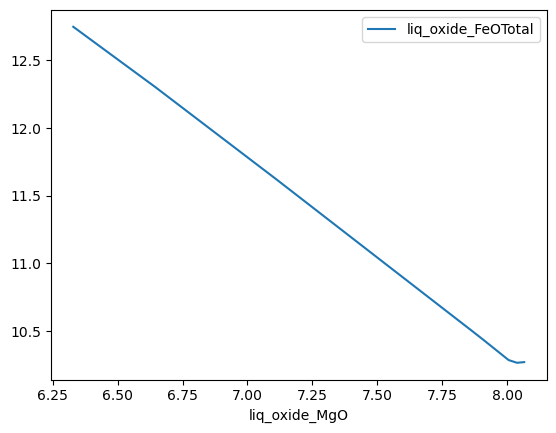

In [20]:
fig, ax = plt.subplots()
df.plot('liq_oxide_MgO', 'liq_oxide_FeOTotal', ax = ax)


<Axes: xlabel='T_C'>

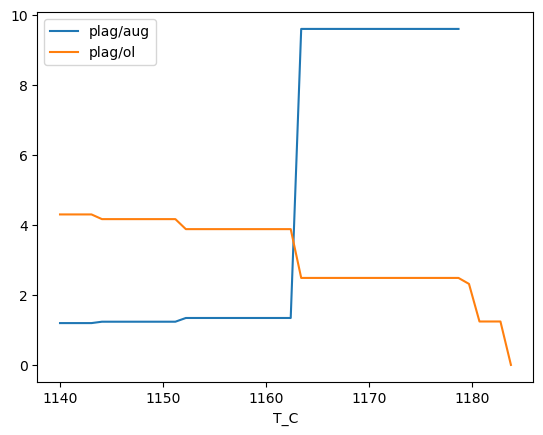

In [82]:
fig, ax = plt.subplots()
df.plot('T_C', 'plag/aug', ax = ax)
df.plot('T_C', 'plag/ol', ax = ax)
# plt.ylim(0,2)